# Image histogram

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import requests

## Data Import

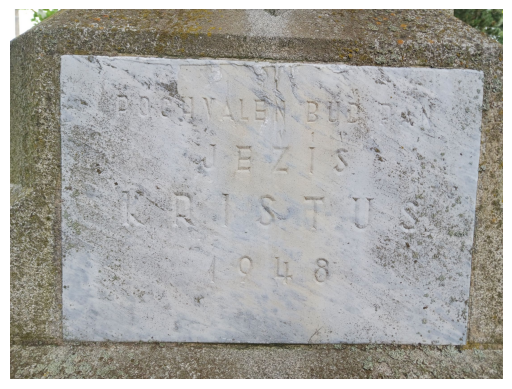

In [29]:
# Image URL
url = "https://d34-a.sdn.cz/d_34/c_img_oc_A/nPvSisOTaMBEthripD6BPRB/8837.jpeg?fl=res,2200,2200,1"

# Download the image
resp = requests.get(url)

img_array = np.frombuffer(resp.content, np.uint8)

# Decode image (OpenCV reads in BGR)
img = cv.imdecode(img_array, cv.IMREAD_COLOR)

# Convert BGR → RGB for Matplotlib
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display
plt.imshow(img)
plt.axis("off")
plt.show()

## Histogram equalization

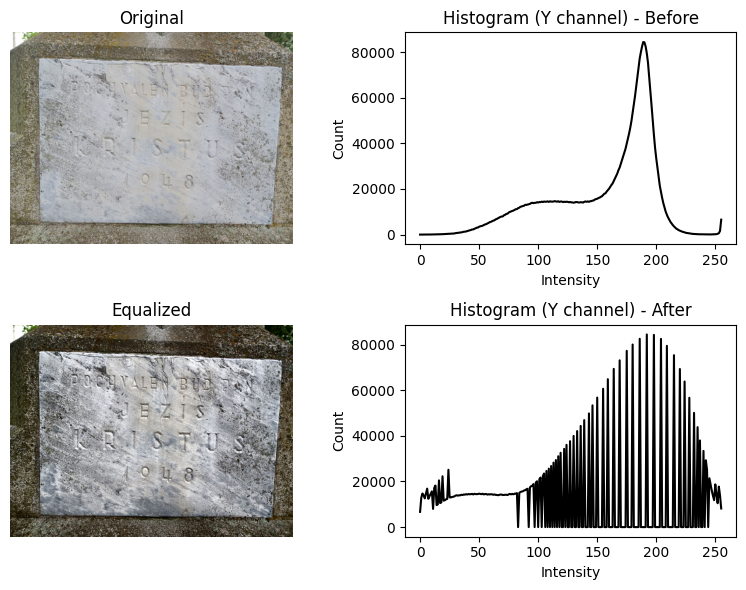

In [30]:
# Convert to YCrCb
ycrcb = cv.cvtColor(img, cv.COLOR_RGB2YCrCb)
y_channel = ycrcb[:,:,0]

# Compute histogram before equalization
hist_before, bins = np.histogram(y_channel.flatten(), bins=256, range=[0,256])

# Equalize Y channel
ycrcb_eq = ycrcb.copy()
ycrcb_eq[:,:,0] = cv.equalizeHist(y_channel)

# Convert back to RGB
img_eq = cv.cvtColor(ycrcb_eq, cv.COLOR_YCrCb2RGB)

# Histogram after equalization
hist_after, bins = np.histogram(ycrcb_eq[:,:,0].flatten(), bins=256, range=[0,256])

# Plot results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

# Histogram before
plt.subplot(2, 3, 2)
plt.plot(hist_before, color="black")
plt.title("Histogram (Y channel) - Before")
plt.xlabel("Intensity")
plt.ylabel("Count")

# Equalized image
plt.subplot(2, 3, 4)
plt.imshow(img_eq)
plt.title("Equalized")
plt.axis("off")

# Histogram after
plt.subplot(2, 3, 5)
plt.plot(hist_after, color="black")
plt.title("Histogram (Y channel) - After")
plt.xlabel("Intensity")
plt.ylabel("Count")

plt.tight_layout()
plt.show()